In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf

import pandas as pd

In [ ]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [ ]:
red['type'] = 0
white['type'] = 1

# 2개의 데이터를 세로 방향으로 합치기
wine = pd.concat([red, white])
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

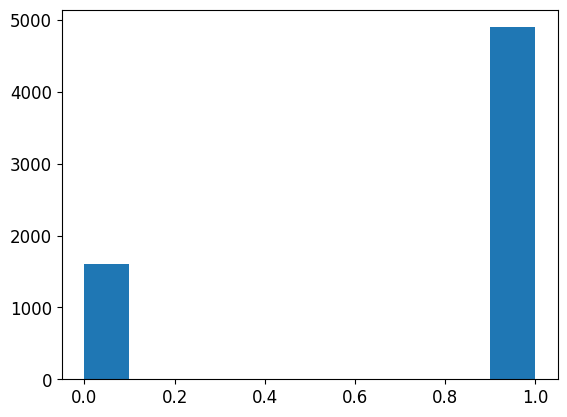

In [ ]:
plt.hist(wine['type'])
plt.show()

In [ ]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [ ]:
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1504       0.264463          0.060000     0.445783        0.187117   0.059801   
1419       0.322314          0.373333     0.126506        0.024540   0.112957   
3162       0.247934          0.206667     0.204819        0.104294   0.018272   
3091       0.206612          0.133333     0.283133        0.162577   0.051495   
2433       0.297521          0.180000     0.120482        0.203988   0.074751   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1504             0.079861              0.276498  0.136688  0.418605   
1419             0.107639              0.292627  0.163678  0.426357   
3162             0.128472              0.292627  0.096588  0.356589   
3091             0.208333              0.407834  0.169848  0.310078   
2433             0.215278              0.513825  0.226913  0.302326   

      sulphates   alcohol   quality  type  
1504   0.089888  0.608696  0.833333   1.0 

In [ ]:
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])


[[0.26446281 0.06       0.44578313 0.18711656 0.05980066 0.07986111
  0.2764977  0.13668787 0.41860465 0.08988764 0.60869565 0.83333333
  1.        ]
 [0.32231405 0.37333333 0.12650602 0.02453988 0.11295681 0.10763889
  0.29262673 0.16367843 0.42635659 0.12921348 0.27536232 0.33333333
  0.        ]
 [0.24793388 0.20666667 0.20481928 0.10429448 0.01827243 0.12847222
  0.29262673 0.09658762 0.35658915 0.12359551 0.57971014 0.66666667
  1.        ]
 [0.20661157 0.13333333 0.28313253 0.16257669 0.05149502 0.20833333
  0.4078341  0.1698477  0.31007752 0.16292135 0.2173913  0.5
  1.        ]
 [0.29752066 0.18       0.12048193 0.20398773 0.07475083 0.21527778
  0.51382488 0.22691344 0.30232558 0.15730337 0.13043478 0.5
  1.        ]]


In [ ]:
# 훈련에 사용할 데이터로 생성
train_idx = int(len(wine_np) * 0.8)
'''
wine_np[, -1]은 target.
train_idx 기준으로 행 단위로 분할해서 train, test로 분할
맨 마지막 열을 기준으로 열 단위로 분할하여 feature와 target으로 분할
'''


train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

# 레드와 화이트로 분류.
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_X.shape, test_X.shape)
print(train_Y.shape, test_Y.shape)

(5197, 12) (1300, 12)
(5197, 2) (1300, 2)


In [ ]:
# 분류 모델
# 피처의 개수가 많을 때
# 맨 마지막 출력 층ㅇㅇ의 units은 클래스 ㅣ므로 다항 분류 이므로 activation은 softmax
#
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12, )),
    tf.keras.layers.Dense(units=36, activation='relu'),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')] # 출력 층은 softmax.
)

# 최적화 함수는 Adam 학숩률은 0.03
# 손실 함수는 카테고리 크로스엔트로피
# 평가 지표는 정확도
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# 후녈ㄴ
history = model.fit(train_X, train_Y, epochs=25)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 48)                624       
                                                                 
 dense_21 (Dense)            (None, 36)                1764      
                                                                 
 dense_22 (Dense)            (None, 24)                888       
                                                                 
 dense_23 (Dense)            (None, 12)                300       
                                                                 
 dense_24 (Dense)            (None, 2)                 26        
                                                                 
Total params: 3602 (14.07 KB)
Trainable params: 3602 (14.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
163/163 [

In [ ]:
# validation_split을 설정하면 그 비율만큼을 검증 데이터로 사용해서 검증을 수행
# batch_size는 데이터를 분할해서 학습을 수행
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25,
                    batch_size=64)


Epoch 1/25
61/61 [==============================] - 1s 12ms/step - loss: 0.0240 - accuracy: 0.9951 - val_loss: 0.0185 - val_accuracy: 0.9977
Epoch 2/25
61/61 [==============================] - 0s 6ms/step - loss: 0.0226 - accuracy: 0.9954 - val_loss: 0.0219 - val_accuracy: 0.9954
Epoch 3/25
61/61 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9949 - val_loss: 0.0179 - val_accuracy: 0.9962
Epoch 4/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9949 - val_loss: 0.0220 - val_accuracy: 0.9962
Epoch 5/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.0192 - val_accuracy: 0.9969
Epoch 6/25
61/61 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9954 - val_loss: 0.0198 - val_accuracy: 0.9962
Epoch 7/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9956 - val_loss: 0.0190 - val_accuracy: 0.9969
Epoch 8/25
61/61 [=

In [ ]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9962


[0.05906016379594803, 0.9961538314819336]

# 품질을 3가지로 나누어서 분류

In [ ]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [ ]:
# 타겟 생성
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.0


In [ ]:
# 피처 정규화
# del wine['quality']

# 복제본 생성
wine_backup = wine.copy()


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.297521          0.413333     0.000000        0.019939   0.111296   
1          0.330579          0.533333     0.000000        0.030675   0.147841   
2          0.330579          0.453333     0.024096        0.026074   0.137874   
3          0.611570          0.133333     0.337349        0.019939   0.109635   
4          0.297521          0.413333     0.000000        0.019939   0.111296   
...             ...               ...          ...             ...        ...   
4893       0.198347          0.086667     0.174699        0.015337   0.049834   
4894       0.231405          0.160000     0.216867        0.113497   0.063123   
4895       0.223140          0.106667     0.114458        0.009202   0.053156   
4896       0.140496          0.140000     0.180723        0.007669   0.021595   
4897       0.181818          0.086667     0.228916        0.003067   0.018272   

      free sulfur dioxide  

In [ ]:
# 타겟을 제외한 부분을 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
print(wine_norm)

In [ ]:
# 훈련 데이터와 테스트 데이터를 분할
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

# 타겟을 원 핫 인코딩 하기
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(5197, 12) (5197, 3)
(1300, 12) (1300, 3)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.07),
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25)

Epoch 1/100
122/122 [==============================] - 2s 5ms/step - loss: 0.9669 - accuracy: 0.5112 - val_loss: 0.8794 - val_accuracy: 0.5569
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.8935 - accuracy: 0.5450 - val_loss: 0.9083 - val_accuracy: 0.5415
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.8680 - accuracy: 0.5692 - val_loss: 0.8411 - val_accuracy: 0.6031
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.8522 - accuracy: 0.5766 - val_loss: 0.8493 - val_accuracy: 0.5885
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.8516 - accuracy: 0.5810 - val_loss: 0.8479 - val_accuracy: 0.5908
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.8430 - accuracy: 0.5843 - val_loss: 0.8504 - val_accuracy: 0.5823
Epoch 7/100
122/122 [==============================] - 1s 5ms/step - loss: 0.8420 - accuracy: 0.5851 - val_loss: 0.8819 - val_accuracy: 0.5592

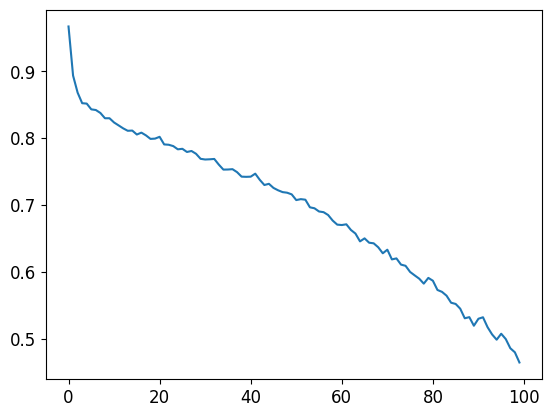

In [ ]:
plt.plot()
plt.plot(history.history['loss'], label='loss')
